# Smooth curve subject to time averages

Find 20 points ($t\in[0,19]$) such that sum of squared differences between them is minimized points for horizon $T=20$, subject to the following time averages:

1. average for $t\in [0,4]$ has to be 35.0
1. average for $t\in [3,6]$ has to be 45.0
1. average for $t\in [15,19]$ has to be 80.0
1. overall average has to be between 30 and 70
1. first and last point have to be the same


In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
t = [i for i in range(20)]
x = cp.Variable(shape=(20,), name="curve")
constraints = [
    cp.sum(x[:5]) == 5*35.0,
    cp.sum(x[3:7]) == 4*45.0,
    cp.sum(x[15:]) == 5*80.0,
    cp.sum(x) >= 20*30.0,
    cp.sum(x) <= 20*70.0,
    x[0] == x[-1],
]
f0 = cp.sum(cp.square(x[:-1] - x[1:]))
objective = cp.Minimize(f0)

In [12]:
problem = cp.Problem(objective, constraints)
problem.solve(verbose=True, solver=cp.OSQP)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Dec 01 10:49:24 AM: Your problem has 20 variables, 6 constraints, and 0 parameters.
(CVXPY) Dec 01 10:49:24 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 01 10:49:24 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 01 10:49:24 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 01 10:49:24 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 01 10:49:24 AM: Compiling problem (target solver=OSQP).
(CVX

1632.7435924042757

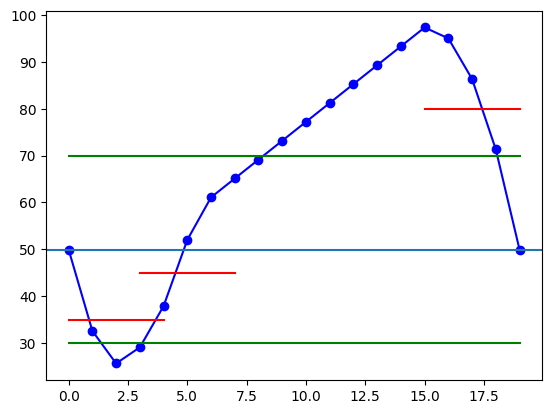

In [15]:
plt.plot(t, x.value, "b-o")
plt.axhline(x[0].value)
plt.plot([0,4], [35,35], "r")
plt.plot([3,7], [45,45], "r")
plt.plot([15,19], [80,80], "r")
plt.plot([0,19], [30,30], "g")
plt.plot([0,19], [70,70], "g")